In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np

from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import tensorflow as tf
#%matplotlib inline

tf.compat.v1.disable_eager_execution()

In [2]:
train_in = np.genfromtxt('data.in')

In [3]:
x_train, y_train = train_in[:, :-1], train_in[:, -1]

In [4]:
x_train_1, y_train_1 = x_train[251:, ], y_train[251:, ]

In [5]:
y_train = y_train.reshape(-1, 1)
y_train_1 = y_train_1.reshape(-1, 1)

print(x_train.shape)
print(x_train_1.shape)

print(y_train.shape)
print(y_train_1.shape)

(1000, 1)
(749, 1)
(1000, 1)
(749, 1)


In [6]:
w_1 = tf.Variable(tf.zeros([1, 1]), dtype=tf.float32)
w_2 = tf.Variable(tf.zeros([1, 1]), dtype=tf.float32)
w_3 = tf.Variable(tf.zeros([1, 1]), dtype=tf.float32)

b = tf.Variable(tf.zeros([1]), dtype=tf.float32)

x = tf.compat.v1.placeholder(tf.float32, [None, 1])
y = tf.compat.v1.placeholder(tf.float32, [None, 1])

In [7]:
yhat =  tf.matmul(x**3, w_3) +  tf.matmul(x**2, w_2) + tf.matmul(x, w_1) + b
#x**3/6 + x**2/2 + x + 1
loss = tf.reduce_mean(tf.square(y - yhat))
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.00055)
train = optimizer.minimize(loss)
accuracy = tf.reduce_mean(tf.cast(tf.equal(y, yhat), dtype=tf.float32))
init = tf.compat.v1.global_variables_initializer()

In [8]:
MaxEpoch = 20000

with tf.compat.v1.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        curr_w_1, curr_w_2, curr_w_3, curr_b, curr_loss = sess.run([w_1, w_2, w_3, b, loss], feed_dict={x:x_train, y:y_train})
        sess.run(train, feed_dict={x:x_train, y:y_train})
        if(epoch % 1000 == 0):
            print("w_1: {}, w_2: {}, w_3: {}, b(bias): {}, loss: {}" .format(curr_w_1, curr_w_2, curr_w_3, curr_b, curr_loss))
    c, a = sess.run([yhat, accuracy], feed_dict={x: x_train, y: y_train})
    print("\nCorrect (Y): ", c, "\nAccuracy: ", a)
    #predicted = sess.run(y.hat, feed_dict={x:x_train})

w_1: [[0.]], w_2: [[0.]], w_3: [[0.]], b(bias): [0.], loss: 380.2220764160156
w_1: [[0.40850645]], w_2: [[0.4111064]], w_3: [[0.4136862]], b(bias): [0.40766418], loss: 35.45266342163086
w_1: [[0.52695686]], w_2: [[0.5425484]], w_3: [[0.5580062]], b(bias): [0.52263826], loss: 8.304888725280762
w_1: [[0.49771303]], w_2: [[0.5395325]], w_3: [[0.5818519]], b(bias): [0.49044707], loss: 7.918247222900391
w_1: [[0.4325674]], w_2: [[0.51281136]], w_3: [[0.59761906]], b(bias): [0.43357232], loss: 7.703704357147217
w_1: [[0.34261665]], w_2: [[0.4720188]], w_3: [[0.6192879]], b(bias): [0.38540933], loss: 7.459667205810547
w_1: [[0.22952892]], w_2: [[0.41261306]], w_3: [[0.6470294]], b(bias): [0.38886037], loss: 7.207736968994141
w_1: [[0.09785782]], w_2: [[0.32874608]], w_3: [[0.68038183]], b(bias): [0.50370574], loss: 6.9409894943237305
w_1: [[-0.05028817]], w_2: [[0.21335953]], w_3: [[0.7203579]], b(bias): [0.75938976], loss: 6.6389384269714355
w_1: [[-0.20839]], w_2: [[0.06208796]], w_3: [[0.7

In [9]:
w_1_1 = tf.Variable([[1]], dtype=tf.float32, trainable=False)
w_2_1 = tf.Variable(tf.zeros([1, 1]), dtype=tf.float32)
w_3_1 = tf.Variable(tf.zeros([1, 1]), dtype=tf.float32)

b_1 = tf.Variable(tf.zeros([1]), dtype=tf.float32)

x_1 = tf.compat.v1.placeholder(tf.float32, [None, 1])
y_1 = tf.compat.v1.placeholder(tf.float32, [None, 1])

In [10]:
yhat_1 =  tf.matmul(x_1**3, w_3_1) +  tf.matmul(x_1**2, w_2_1) + tf.matmul(x_1, w_1_1) + b_1
#x**3/6 + x**2/2 + x + 1
loss_1 = tf.reduce_mean(tf.square(y_1 - yhat_1))
optimizer_1 = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001)
train_1 = optimizer_1.minimize(loss_1)
accuracy_1 = tf.reduce_mean(tf.cast(tf.equal(y_1, yhat_1), dtype=tf.float32))
init = tf.compat.v1.global_variables_initializer()

In [11]:
MaxEpoch = 17000

with tf.compat.v1.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        curr_w_1, curr_w_2, curr_w_3, curr_b, curr_loss = sess.run([w_1_1, w_2_1, w_3_1, b_1, loss_1], feed_dict={x_1:x_train_1, y_1:y_train_1})
        sess.run(train_1, feed_dict={x_1:x_train_1, y_1:y_train_1})
        if(epoch % 1000 == 0):
            print("w_1: {}, w_2: {}, w_3: {}, b(bias): {}, loss: {}" .format(curr_w_1, curr_w_2, curr_w_3, curr_b, curr_loss))
            c_1, a_1 = sess.run([yhat_1, accuracy_1], feed_dict={x_1: x_train_1, y_1: y_train_1})
    print("\nCorrect (Y): ", c_1, "\nAccuracy: ", a_1)
    #predicted = sess.run(y.hat, feed_dict={x:x_train})

w_1: [[1.]], w_2: [[0.]], w_3: [[0.]], b(bias): [0.], loss: 404.0326232910156
w_1: [[1.]], w_2: [[0.50425094]], w_3: [[0.52121043]], b(bias): [0.45816278], loss: 12.475788116455078
w_1: [[1.]], w_2: [[0.48376063]], w_3: [[0.56001675]], b(bias): [0.28338298], loss: 11.319184303283691
w_1: [[1.]], w_2: [[0.4163906]], w_3: [[0.58796805]], b(bias): [0.00064296], loss: 10.606746673583984
w_1: [[1.]], w_2: [[0.32055005]], w_3: [[0.6254672]], b(bias): [-0.3240314], loss: 9.904572486877441
w_1: [[1.]], w_2: [[0.19642572]], w_3: [[0.6700333]], b(bias): [-0.6053627], loss: 9.370361328125
w_1: [[1.]], w_2: [[0.04617506]], w_3: [[0.7175639]], b(bias): [-0.72122496], loss: 9.025410652160645
w_1: [[1.]], w_2: [[-0.13764209]], w_3: [[0.76720023]], b(bias): [-0.5640455], loss: 8.731396675109863
w_1: [[1.]], w_2: [[-0.38116616]], w_3: [[0.8267522]], b(bias): [-0.13790433], loss: 8.367934226989746
w_1: [[1.]], w_2: [[-0.7058908]], w_3: [[0.9046299]], b(bias): [0.48401138], loss: 7.935088634490967
w_1: [

In [12]:
exp_x = np.linspace(0, 4, len(x_train))
exp_y = 10*x_train - 8

#scaler = RobustScaler()
#scaler.fit(y_train)
#scaled_y = scaler.transform(y_train)

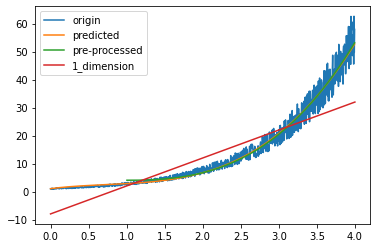

In [13]:
plt.plot(x_train, y_train, label = 'origin')
plt.plot(x_train, c, label = 'predicted')
plt.plot(x_train_1, c_1, label = 'pre-processed')
#plt.plot(x_train, scaled_y, label='scaled')
plt.plot(exp_x, exp_y, label = '1_dimension')

plt.legend()
plt.show()